<a href="https://colab.research.google.com/github/AlecSofiste/Analise_diversidade/blob/main/Analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

#Uso da biblioteca Pandas

In [ ]:
#Montado drive para importar conteúdo
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Atribuindo a planilha_modulo3 à variável dados
dados = pd.read_excel('/content/drive/MyDrive/Curso Programaria/planilha_modulo3.xlsx')

In [ ]:
#mostrando o conteúdo da variável dados
dados

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0


In [ ]:
#mostrando as primeiras linhas da tabela dados
dados.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0


In [ ]:
#mostrando as ultimas linhas da tabela dados
dados.tail()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,True,...,Agronegócios,de 501 a 1.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


In [ ]:
#mostrando numero de linhas e colunas da tabela dados
dados.shape

(4271, 28)

In [ ]:
#mostrando o numero de itens na tabela
len(dados)

4271

In [ ]:
#mostrando quais são as colunas da tabela dados
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
#função info mostra índices, colunas, total de dados, quantidade de cada tipo de dado(dtypes),valores não nulos e memória ocupada.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
#função describe dá informações sobre as variáveis numéricas, valores máximos e mínimos, média, desvio e mediana
dados.describe()

,Unnamed: 0,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4271.000000,4197.000000,4171.000000,3694.000000,3694.000000
mean,2135.000000,31.169168,0.806281,0.193016,10969.266919
std,1233.075829,6.902803,0.395258,0.394719,19419.753189
min,0.000000,18.000000,0.000000,0.000000,35.000000
25%,1067.500000,26.000000,1.000000,0.000000,4269.500000
50%,2135.000000,30.000000,1.000000,0.000000,7625.500000
75%,3202.500000,35.000000,1.000000,0.000000,12778.500000
max,4270.000000,54.000000,1.000000,1.000000,485191.000000


# Repetindo análise do excel

###Dicas de funções
Reiniciar o índice ao filtrar dados (reset_index)

Remover ou renomear colunas (.drop(columns=[]) e .rename(columns={}))

Remover valores duplicados e/ou ausentes (.drop_duplicates() e .dropna())

Tratar valores ausentes, substituindo nulos por zero, por exemplo (.fillna(0))

Converter tipos de dados (.astype())

Criar, dividir ou reordenar colunas (para dividir: .split())

Remover espaços em branco (.strip())

Classificar os dados (.sort_values(by='coluna', ascending=False))



In [ ]:
#Mostrando novamente as colunas da tabela
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
#mostrando coluna especifica da tabela
dados['GENERO']

,GENERO
0,Masculino
1,Masculino
2,Masculino
3,Masculino
4,Feminino
...,...
4266,Masculino
4267,Feminino
4268,Masculino
4269,Masculino


In [ ]:
#filtrando dados por coluna, buscando valor especificado
dados[dados['GENERO']=='Feminino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
#filtrando dados por coluna, buscando valor especificado
dados[dados['GENERO']!='Masculino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
#filtrando da coluna genero, os dados que contenham a string 'não' para localizar  as ID que preferiram não informar genero
dados[dados['GENERO'].str.contains('não', na=False)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


In [ ]:
#filtrando da coluna idade, aqueles que são maiores de 30 anos
dados[dados['IDADE']>30]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,62001.0
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0


In [ ]:
#filtrando da coluna idade e da coluna genero, as mulheres maiores de 30 anos
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
23,23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,de 5 a 6 anos,13418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,4214,0gprow0ownrbfneftxf0gprow4kyrqdy,41.0,40-44,Feminino,Branca,Prefiro não informar,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Seguros ou Previdência,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,11452.0
4221,4221,0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d,34.0,30-34,Feminino,Outra,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5687.0
4240,4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Menos de 1 ano,1182.0
4247,4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor de Energia,de 11 a 50,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,5925.0


In [ ]:
#filtrando da coluna etinia, aqueles que se consideram amarelos
dados[dados['COR/RACA/ETNIA']=='Amarela']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,zbukfwxvpwlk6loglm0zbukfwx6bvyb6,40.0,40-44,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Mais de 10 anos,11388.0
107,107,z9toybzbja7n6xjjbz9f8hmofrry69tg,44.0,40-44,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Indústria,Acima de 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,Mais de 10 anos,14500.0
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0
4210,4210,0hbwm1d1wz739r40hbwm1df6ky5kn4ap,43.0,40-44,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Sênior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Mais de 10 anos,7131.0
4257,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,62001.0


In [ ]:
#filtrando da coluna idade, aqueles menores de 40 anos
dados[dados['IDADE']<40]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
6,6,zytlxsdgalh22cgrijvzytlxa49i8yzx,21.0,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,4491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,4265,01nmlhyw8w2b4stchg01nmlvlcqp0iis,28.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Marketing,de 1 a 5,0.0,NaN,Analista de Marketing,Pleno,de R$ 2.001/mês a R$ 3.000/mês,de 3 a 4 anos,de 1 a 2 anos,2348.0
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0


In [ ]:
#filtrando da coluna etnia e da coluna idade, aqueles que se consideram amarelos e menores de 40 anos
dados[(dados['COR/RACA/ETNIA']=='Amarela') & (dados['IDADE']<40)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
13,13,zwh83jpy6x40b95xigsr2zwh83jpflu3,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,5296.0
85,85,zfeuk2m9jozahicujlla8zfeuk2g7apj,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,159,ytrnz3zyvn791t3dum1ytrnz3zp22tmk,37.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Aprov...",True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,10628.0
170,170,yri3z491ejizlpj9ylu2k3jyri3z4915,34.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,16650.0
195,195,yjbpxmkqz5yidh5oszyjbpxmkgcb1zd9,32.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,3947,2tnsh0gxdu3aq4z2d2tnsh0hk15brx7q,31.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,False,...,Tecnologia/Fábrica de Software,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 25.001/mês a R$ 30.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,29408.0
4058,4058,1t3ndwx8j50k0bz1t3ndwxdpwyg17c2k,27.0,25-29,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Nível de cobrança no trabalho / Stress no trab...,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,14175.0
4176,4176,0qpa64gqpieg60xpygnajt70qpa64g1a,27.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,4207,0ibb8fj9qrwpswfqiil0ibb89e3e4hz3,30.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Área de Consultoria,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,de 5 a 6 anos,16298.0


In [ ]:
#lendo tabela usando função do Pandas e atribuindo a variável df
df = pd.read_csv('/content/drive/MyDrive/Curso Programaria/licitacoes.csv', encoding="latin1", sep=";")

In [ ]:
#filtrando da coluna situação licitação, aquelas que estão encerradas
df[df['Situação Licitação']=='Encerrado']

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,UF,Município,Data Resultado Compra,Data Abertura,Valor Licitação
3,12018,925135,BANCO CENTRAL DO BRASIL - RECIFE,6,Dispensa de Licitação,148097,"Objeto: TV LED de 65 polegadas, UHD 4k, com co...",Encerrado,20101,Sem informação,25201,BANCO CENTRAL DO BRASIL-ORC.FISCAL/SEG.SOCIAL,-3,Inválido,04/12/2018,30/11/2018,"11075,9900"
16,12018,130129,SUPERINT.REG.DE DESENV.DA LAV.CACAUEIRA/MT,6,Dispensa de Licitação,0000000000032018,Objeto: Atender despesas com telefonia fixa e ...,Encerrado,22000,Ministério da Agricultura e Pecuária,22000,Ministério da Agricultura e Pecuária - Unid,MT,ALTA FLORESTA,06/12/2018,NaN,"1541,7000"
18,12018,135097,EMBRAPA CAFE,7,Inexigibilidade de Licitação,21163.000694/2018,Objeto: Serviço de genotipagem de 384 amostras...,Encerrado,22000,Ministério da Agricultura e Pecuária,22202,Empresa Brasileira de Pesquisa Agropecuária,DF,BRASILIA,04/12/2018,NaN,"90504,0000"
19,12018,152140,IFB - CAMPUS TAGUATINGA NORTE,6,Dispensa de Licitação,23162004935201845,Objeto: Contratação de empesa especializada a ...,Encerrado,26000,Ministério da Educação,26428,Instituto Federal de Brasília,DF,BRASILIA,31/12/2018,NaN,"2068,0000"
24,12018,153092,BIBLIOTECA CENTRAL DA UFPE,6,Dispensa de Licitação,23076025958201862,Objeto: Aquisição de Equipamento de Proteção I...,Encerrado,26000,Ministério da Educação,26242,Universidade Federal de Pernambuco,PE,RECIFE,06/12/2018,29/11/2018,"5609,0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15327,907662018,926130,DIVISÃO DE CENTRO DE SERV COMPRATILHADOS BSB,6,Dispensa de Licitação,PL.CSG.A.90766,"Objeto: Fornecimento de fogão, para entrega na...",Encerrado,20101,Sem informação,91081,FURNAS-CENTRAIS ELETRICAS S.A.,-3,Inválido,10/12/2018,04/12/2018,"817,2000"
15328,907732018,926130,DIVISÃO DE CENTRO DE SERV COMPRATILHADOS BSB,6,Dispensa de Licitação,PL.CSG.A.90773,Objeto: Prestação de serviços para locação de ...,Encerrado,20101,Sem informação,91081,FURNAS-CENTRAIS ELETRICAS S.A.,-3,Inválido,20/12/2018,05/12/2018,"8400,0000"
15329,908252018,926130,DIVISÃO DE CENTRO DE SERV COMPRATILHADOS BSB,6,Dispensa de Licitação,PL.CSG.A.90825,Objeto: Coleta e descarte de resíduos industri...,Encerrado,20101,Sem informação,91081,FURNAS-CENTRAIS ELETRICAS S.A.,-3,Inválido,21/12/2018,17/12/2018,"9040,0000"
15333,990922018,158139,"INST.FED.DE EDUC.,CIENC.E TEC.FLUMINENSE",6,Dispensa de Licitação,23317009092201862,Objeto: Aquisição de material para revisão do ...,Encerrado,26000,Ministério da Educação,26434,Instituto Federal Fluminense,RJ,CAMPOS DOS GOYTACAZES,03/12/2018,NaN,"1149,7500"


In [ ]:
#mostrando a contagem de valores em cada variavel da coluna situação licitação
df['Situação Licitação'].value_counts()

,count
Situação Licitação,
Encerrado,9016
Publicado,3709
Evento de Resultado de Julgame,1922
Retificação,127
Evento de Alteração Publicad,93
Evento de Suspensão Publicado,72
Anulação,67
Revogação,63
Divulgado,55


In [ ]:
#agrupando valores de ID por genero
dados.groupby('GENERO')['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12


In [ ]:
#agrupando valores da coluna genero, mas mostrando variavel NaN(not a number:dado não informado na tabela), para isso foi usado parametro dropna=false
dados.groupby('GENERO',dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
#Fazendo contagem de valores usando parametro dropna=false
dados['GENERO'].value_counts(dropna=False)

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12
NaN,9


In [ ]:
#filtrando e contando valores da coluna idade que são maiores de 30 anos e separando por nivel
dados[dados['IDADE']>30]['NIVEL'].value_counts()

,count
NIVEL,
Sênior,525
Pleno,408
Júnior,274


In [ ]:
#filtrando as mulheres maiores que 30 anos e fazendo contagem por nivel
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]['NIVEL'].value_counts()

,count
NIVEL,
Pleno,117
Sênior,114
Júnior,96


In [ ]:
#criando tabela dinamica com função pivot_table do Pandas, cruzando valores das colunas ID, genero e pessoa gestora. parametro aggfunc no método contagem.
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count')

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

# Estatistica Básica

➡️Média: Representa o valor central dos dados. É calculada pela soma de todos os valores e divisão pela quantidade de valores.

A função **np.mean()** é utilizada para calcular a média em listas do NumPy.

A função **dados["IDADE"].mean()** calcula a média da coluna "IDADE" no Pandas.

Podemos calcular também a média ponderada, em que cada valor tem um peso diferente. Por exemplo, vamos imaginar que estamos fazendo uma votação para definir o preço de um produto em uma empresa, mas os votos dos diretores da empresa têm um peso maior. Então para isso temos uma coluna com os pesos dos votos e outra com o preço. O cálculo da média ponderada fica assim:  

**media_ponderada = (df[Preco] * df['Pesos']).sum() / df['Pesos'].sum()**


➡️Mediana: Valor central dos dados ordenados. Menos afetada por valores extremos ("outliers").

A função **np.median()** calcula a mediana em listas do NumPy.

A função **dados["IDADE"].median()** calcula a mediana da coluna "IDADE" no Pandas.


➡️Moda: Valor que aparece mais frequentemente nos dados.

A função **dados["IDADE"].mode()** calcula a moda da coluna "IDADE" no Pandas.


➡️Desvio Padrão: Mede a dispersão dos dados em relação à média.

A função **dados["IDADE"].std()** calcula o desvio padrão da coluna "IDADE" no Pandas.


➡️Min e Max: Retornam o menor e o maior valor da coluna, respectivamente.

A função **dados["IDADE"].min()** retorna o valor mínimo da coluna "IDADE" no Pandas.

A função **dados["IDADE"].max()** retorna o valor máximo da coluna "IDADE" no Pandas.

### Compreendendo funções estatisticas

In [ ]:
#criando lista com valores aleatórios
lista_idades = [26,30,32,22,26,35,40,20,43,31,23,]

In [ ]:
#usando função sum  do numpy para somar todos os valores da variavel
np.sum(lista_idades)

np.int64(328)

In [ ]:
#usando função len para contar os elementos da variável
len(lista_idades)

11

In [ ]:
#calculando a média aritmética manualmente
np.sum(lista_idades)/len(lista_idades)

np.float64(29.818181818181817)

In [ ]:
#usando função mean para calcular a média aritmética dos elementos
media = np.mean(lista_idades)
print("Média Aritmetica: ", media)

Média Aritmetica:  29.818181818181817


In [ ]:
#usando função sort para organizar a lista em ordem crescente
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]

In [ ]:
lista_idades = [26,30,32,22,26,35,40,20,43,31,23,100]

In [ ]:
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43, 100]

In [ ]:
#calculando a mediana usando função median do numpy
mediana  = np.median(lista_idades)
mediana

np.float64(30.5)

### Voltando para a tabela

In [ ]:
#calculando a média de idades na coluna usando função mean
dados['IDADE'].mean()

np.float64(31.169168453657374)

In [ ]:
#calculando a mediana de idades na coluna usando função median
dados['IDADE'].median()

30.0

In [ ]:
#calculando a moda de idades na coluna usando função mode
dados['IDADE'].mode()

,IDADE
0,27.0


In [ ]:
#calculando o desvio padrão da coluna idade usando função std
dados['IDADE'].std()

6.902802832143141

In [ ]:
#identificando o valor minimo da coluna idade usando função min
dados['IDADE'].min()

18.0

In [ ]:
#identificando o valor maximo da coluna idade usando a função max
dados['IDADE'].max()

54.0

In [ ]:
#calculando a média de idades das mulheres
dados[dados['GENERO']=='Feminino']['IDADE'].mean()

np.float64(31.318051575931232)

In [ ]:
#calculando a média de idades dos homens
dados[dados['GENERO']=='Masculino']['IDADE'].mean()

np.float64(31.147876077930373)

In [ ]:
#calculando a média de salarios das mulheres
dados[dados['GENERO']=='Feminino']['SALARIO'].mean()

np.float64(8673.22460496614)

In [ ]:
#calculando a média de salarios dos homens
dados[dados['GENERO']=='Masculino']['SALARIO'].mean()

np.float64(11724.552688172043)

#  Valores Faltantes

Os dados nulos podem ter sido ocasionados por vários motivos: erro no preenchimento de dados, realmente falta da informação, apagamento de informações. Da mesma forma, não há um único método para tratar valores nulos. Podemos:

➡️Deletar todas as linhas com valores faltantes. É simples, mas pode resultar na perda de muitos dados, especialmente se houver muitos valores nulos.

➡️Substituir os valores faltantes pela média, ou mediana, ou moda para variáveis categóricas, ou algum valor padrão. Contudo, essa prática pode ignorar a relação entre variáveis.

➡️Uma outra possibilidade é usar um modelo de aprendizado de máquina, que considera a covariância, mas é mais trabalhoso.

Nessa aula vimos que temos 3 colunas com valores nulos na nossa tabela: GENERO, IDADE e SALÁRIO.

➡️A coluna "GENERO" tem 9 valores nulos e nesse caso decidimos preencher com um valor padrão já usado na tabela: "Prefiro não informar", para isso usamos a função fillna() que pega os nulos e substitui pelo valor passado.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

### Trabalhando coluna de gênero

In [ ]:
#agrupando coluna genero e ID e mostrando seus valores, mostrando inclusive quantos valores nulos
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
#substituindo valores nulos pela string 'Prefiro não informar' usando função fillna
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar')

In [ ]:
#agrupando novamente as colunas genero e ID e mostrando seus valores(Note que os valores nulos foram incluidos na linha 'Prefiro não informar')
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


### Trabalhando coluna de idade

➡️Para a coluna "IDADE", vimos que temos uma coluna que podemos usar de auxílio para preencher os nulos. Então substituímos os valores nulos pela média das idades na faixa etária correspondente. Por exemplo, a média da faixa 17-21 é usada para preencher esses valores nulos.

Já na faixa +55 não tivemos nenhum dado preenchido e por isso usamos a média geral das idades. Um ponto importante é que se fosse em um dia-a-dia no trabalho discutiríamos com o time de trabalho para verificar possíveis erros de formulário.

In [ ]:
#Mostrando quantos deixaram de preencher a tabela idade com algum valor (74)
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
#filtrando valores nulos da coluna idade de acordo com a faixa de idade e contando seus valores
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
#filtrando dados nulos em idade pela faixa de idade e calculando a média entre eles. atribuiu-se o valor a variável media_17_21
media_17_21 = dados[dados['FAIXA IDADE']=='17-21']['IDADE'].mean()
media_17_21

np.float64(20.205479452054796)

### Método de localização do dado usando função loc

In [ ]:
#Usando função loc para identificar todos os que responderam nulo para idade na faixa de 17-21 e atribuindo à variável
dados.loc[(dados['FAIXA IDADE']=='17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [ ]:
#filtrando novamente os valores nulos da coluna idade de acordo com a faixa de idade e contando seus valores(note:valores faltantes foram tratados)
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68


In [ ]:
#Filtrando dados nulos em idade que estejam na faixa 55+
dados[dados['FAIXA IDADE']=='55+']['IDADE']

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
#Analisando o nível hierarquico da faixa de idade 55+
dados[dados['FAIXA IDADE']=='55+']['NIVEL']

,NIVEL
9,Pleno
66,Júnior
96,Pleno
121,Pleno
156,Júnior
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
#calculando a média geral das idades
media_geral = dados['IDADE'].mean()
media_geral

np.float64(31.153517220250375)

In [ ]:
#localizando aqueles que não informaram idade na faixa 55+ e atribuindo valores a váriavel media_geral
dados.loc[(dados['FAIXA IDADE']=='55+') & (dados['IDADE'].isnull()),'IDADE'] = media_geral

In [ ]:
#fazendo contagem de valores nulos para mostrar que todos foram tratados
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


### Tratando coluna salario

➡️Agora, para a coluna "SALARIO", com 577 valores nulos e sem informações na coluna de Faixa salarial, usamos a mediana para preencher, pois ela é menos afetada por valores discrepantes.

Assim, tratamos todos os valores nulos na nossa tabela de forma eficiente e coerente, garantindo a integridade dos dados para análises futuras.

In [ ]:
#filtrando respostas nulas na coluna salario
dados[dados['SALARIO'].isnull()]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#filtrando faixa salarial dos que responderam nulo na coluna salario e mostrando valores(está vazio pois foi tratado)
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


In [ ]:
#calculando a mediana da coluna salario
mediana_salario = dados['SALARIO'].median()

In [ ]:
#substituindo valores nulos pela mediana
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

# Exercicio (Tratando valores faltantes)

In [ ]:
#lendo tabela e atribuindo a variavel df
df = pd.read_csv('/content/drive/MyDrive/Curso Programaria/licitacoes.csv', encoding="latin1", sep=";")

In [ ]:
#monstrando informações da tabela df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15336 entries, 0 to 15335
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Número Licitação          15336 non-null  int64 
 1   Código UG                 15336 non-null  int64 
 2   Nome UG                   15336 non-null  object
 3   Código Modalidade Compra  15336 non-null  int64 
 4   Modalidade Compra         15336 non-null  object
 5   Número Processo           15336 non-null  object
 6   Objeto                    15336 non-null  object
 7   Situação Licitação        15336 non-null  object
 8   Código Órgão Superior     15336 non-null  int64 
 9   Nome Órgão Superior       15336 non-null  object
 10  Código Órgão              15336 non-null  int64 
 11  Nome Órgão                15336 non-null  object
 12  UF                        15336 non-null  object
 13  Município                 15336 non-null  object
 14  Data Resultado Compra 

In [ ]:
#contando valores nulos na coluna data de abertura
df['Data Abertura'].isnull().value_counts()

,count
Data Abertura,
True,10648
False,4688


In [ ]:
#identificando o tipo de variável inserido na coluna
tipo_coluna = df['Data Abertura'].dtype
print(tipo_coluna)

object


In [ ]:
#mostrando coluna
df['Data Abertura']

,Data Abertura
0,17/08/2016
1,NaN
2,NaN
3,30/11/2018
4,NaN
...,...
15331,26/11/2018
15332,NaN
15333,NaN
15334,NaN


In [ ]:
#substituindo valores nulos pela string 'dd/mm/aa' usando função fillna
df['Data Abertura'] = df['Data Abertura'].fillna('dd/mm/aa')

In [ ]:
#Mostrando valores nulos já tratados
df['Data Abertura']

,Data Abertura
0,17/08/2016
1,dd/mm/aa
2,dd/mm/aa
3,30/11/2018
4,dd/mm/aa
...,...
15331,26/11/2018
15332,dd/mm/aa
15333,dd/mm/aa
15334,dd/mm/aa


#Valores Discrepantes

Valores discrepantes ou outliers, que são valores que se destacam significativamente dos demais. Temos algumas formas de identificar esses valores, nessa aula aprendemos duas:



➡️Utilizando o desvio padrão

➡️Através da regra dos quartis.



Devemos usá-las de acordo com o contexto dos nossos dados, se eles já são bem variados ou não.



No exemplo que vimos da lista de idades os dados eram pouco variados e, por isso, a regra dos quartis funcionaria bem para tirarmos o outlier de 15. Confirmamos isso visualizando o boxplot desses dados com a função plt.boxplot



Já com a coluna de salário da nossa tabela, por ser um campo com valores bem variados, a regra dos quartis tiraria muitos valores que não deveriam, confirmamos isso com o boxplot e também o cálculo de qual seria o limite superior e inferior dos nossos dados.



limSup = Q3 + (1.5*IQR) e

limInf = Q1 - (1.5*IQR)



Sendo Q1 nosso quartil de 25% dos dados e Q3 nosso quartil de 75% dos dados. É como se contássemos nossos dados em uma pizza de 4 pedaços e pegássemos onde fica o corte do 1 pedaço e do 3.

Para pegar os quartis usamos a função quantile e passamos o percentual que queremos em valores de 0 a 1.



IQR = Q3 - Q1



⚠️considerando salários acima de 22,359 como outliers.

A análise de contexto é crucial para definir limites🖥️

Calculamos a média e o desvio padrão dos salários com mean() e std(), usando media_salario e desvio_salario, respectivamente. Definimos o limite superior como media_salario + (3*desvio_salario), resultando em 64,806.16, um valor adequado para outliers.

Após identificar os outliers, decidimos se os removeríamos ou substituiríamos. No nosso caso, verificamos a faixa salarial e substituímos salários discrepantes pela média da faixa correspondente, garantindo coerência.✅



In [ ]:
lista_idades = [26,30,32,22,26,35,400,20,43,31,23,]

# Aqui foi inserido um valor discrepante que vai omitir a realidade sobre os valores da média e desvio padrão.
#Por isso é importante identificar e tratar os valores discrepantes(outliers) na analise de dados.

In [ ]:
#calculando a media da lista
media = np.mean(lista_idades)
media

np.float64(62.54545454545455)

In [ ]:
#calculando o desvio padrão da lista
desvio = np.std(lista_idades)
desvio

np.float64(106.89532997398872)

In [ ]:
#calculando limite superior
media + 3*desvio

np.float64(383.2314444674207)

In [ ]:
#calculando limite inferior
media - 3*desvio

np.float64(-258.1405353765116)

In [ ]:
#Importando biblioteca matplotlib.pyplot para analisar graficamente os outliers:(ver importações)

{'whiskers': [<matplotlib.lines.Line2D at 0x77fd68043fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x77fd68049690>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fd682db810>],
 'medians': [<matplotlib.lines.Line2D at 0x77fd6804ab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fd6804b4d0>],
 'means': []}

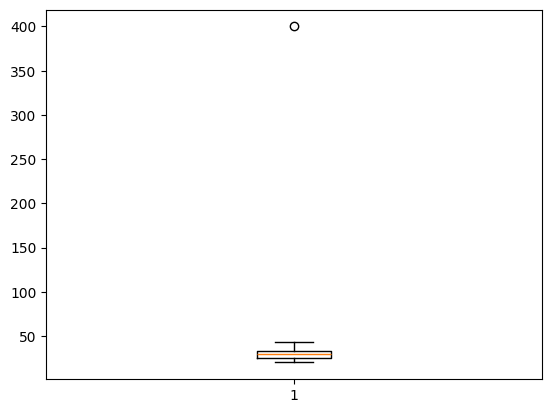

In [ ]:
#mostrando outlier da lista no grafico boxplot
plt.boxplot(lista_idades)

{'whiskers': [<matplotlib.lines.Line2D at 0x77fd680bc490>,
 'caps': [<matplotlib.lines.Line2D at 0x77fd680bd890>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fd6807fb10>],
 'medians': [<matplotlib.lines.Line2D at 0x77fd680bed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fd680bf6d0>],
 'means': []}

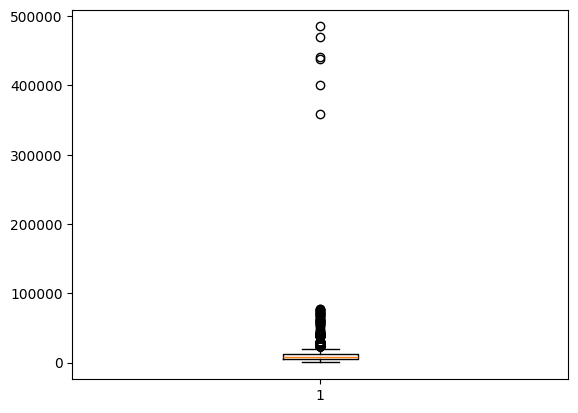

In [ ]:
#Mostrando os outliers da coluna salario no grafico BoxPlot:
plt.boxplot(dados['SALARIO'])

In [ ]:
#Calculando quartil de 25% da coluna
Q1 = dados['SALARIO'].quantile(0.25)
Q1

np.float64(4751.5)

In [ ]:
#Calculando quartil de 75% da coluna
Q3 = dados['SALARIO'].quantile(0.75)
Q3

np.float64(11794.5)

In [ ]:
#Calculando IQR (regra dos quartis)
IQR = Q3-Q1
IQR

np.float64(7043.0)

In [ ]:
#Calculo do limite superior usando regra dos quartis(ler texto abaixo):
lim_superior = Q3 + (1.5*IQR)
lim_superior

np.float64(22359.0)

In [ ]:
#Calculo do limite superior usando regra dos quartis(Ler texto abaixo):
lim_inferior = Q1 - (1.5*IQR)
lim_inferior

np.float64(-5813.0)

In [ ]:
#Mostrando a contagem de pessoas por faixa salarial:
dados['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


In [ ]:
#Criando variavel que vai receber a média(mean) da coluna SALARIO
media_salario = dados['SALARIO'].mean()
media_salario

np.float64(10517.53348162023)

In [ ]:
#Criando variavel que vai receber o desvio padrão(std) da coluna SALARIO:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.210989118474

In [ ]:
#Criando variavel que vai receber o valor do limite superior usando a regra dos quartis(ler texto abaixo):
limite_superior = media_salario + (3*desvio_salario)
limite_superior

np.float64(64806.16644897565)

Calculamos a média e o desvio padrão dos salários com **mean()** e **std()**, usando media_salario e desvio_salario, respectivamente. Definimos o limite superior como media_salario + (3*desvio_salario), resultando em 64,806.16, um valor adequado para outliers.

Após identificar os outliers, decidimos se os removeríamos ou substituiríamos. No nosso caso, verificamos a faixa salarial e substituímos salários discrepantes pela média da faixa correspondente, garantindo coerência.✅

In [ ]:
#Criando filtro para saber quantas pessoas recebem salarios acima do nivel superior (outliers)
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


In [ ]:
#Criando filtro para calcular a média(mean) dos salarios na faixa de 30 a 40 mil, mas que não sejam outliers:
media_30_40 = dados[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_30_40

np.float64(39002.19402985075)

In [ ]:
#Criando filtro para localizar os outliers que recebem salario acima do limite superior e atribuindo a media_30_40 à eles para substituir e tratar:
dados.loc[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_30_40

In [ ]:
#Ao aplicar novamente o filtro para saber quantas pessoas recebem salario acima do limite superior, veremos que os 3 outliers foram tratados:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
#Criando filtro para calcular a média(mean) dos salarios acima de 40mil, mas que não sejam outliers:
media_40 = dados[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_40

np.float64(53127.846153846156)

In [ ]:
#Criando filtro para localizar os outliers que recebem salario acima do limite superior e atribuindo a media_40 à eles para substituir e tratar:
dados.loc[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_40

In [ ]:
#Ao aplicar novamente o filtro para saber quantas pessoas recebem salario acima do limite superior, veremos que todos os outliers foram tratados:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


{'whiskers': [<matplotlib.lines.Line2D at 0x77fd67f14910>,
 'caps': [<matplotlib.lines.Line2D at 0x77fd67f1d5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x77fd67f17b50>],
 'medians': [<matplotlib.lines.Line2D at 0x77fd67f1ea10>],
 'fliers': [<matplotlib.lines.Line2D at 0x77fd67f1f2d0>],
 'means': []}

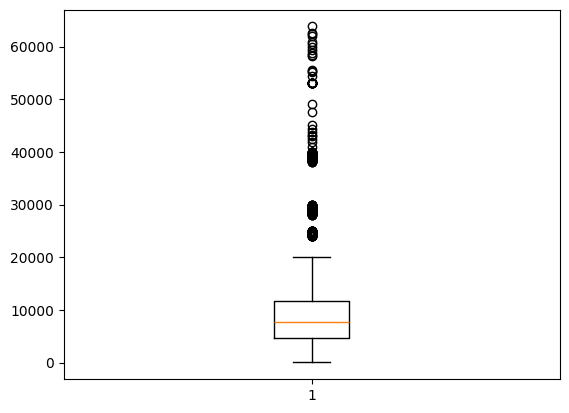

In [ ]:
#Verificando no grafico BoxPlot os valores já tratados:
plt.boxplot(dados['SALARIO'])

# Distribuição amostral e Intervalo de confiança

➡️Média Amostral:

Calculamos a média dos salários na nossa amostra. Isso nos dá uma estimativa do salário médio na população.

➡️Desvio Padrão Amostral:

Calculamos o desvio padrão dos salários na nossa amostra. O desvio padrão nos mostra o quanto os salários variam em relação à média amostral.

➡️Erro Padrão:

O erro padrão é calculado dividindo o desvio padrão da amostra pela raiz quadrada do tamanho da amostra. Ele nos ajuda a entender a precisão da nossa média amostral como uma estimativa da média populacional.

➡️Intervalo de Confiança de 95%:

Calculamos o intervalo de confiança para um nível de 95% de confiança. Isso significa que, se repetíssemos esse processo muitas vezes, 95% das vezes o intervalo conteria a verdadeira média populacional.

Nosso intervalo de confiança calculado foi de 9618 a 10105. O intervalo de confiança de 95% entre 9618 e 10105 significa que estamos 95% confiantes de que a verdadeira média salarial da população está entre 9618 e 10105. Em outras palavras, se coletássemos muitas amostras diferentes e calculássemos intervalos de confiança para cada uma, esperamos que 95% desses intervalos contenham a verdadeira média salarial.

➡️Importância do Intervalo de Confiança:

Precisão: O intervalo de confiança nos dá uma faixa dentro da qual acreditamos que a média populacional se encontra, tornando nossa estimativa mais informativa do que uma única média amostral.

Incerteza: Reconhece a incerteza inerente à amostragem e nos dá uma ideia de quanto essa incerteza pode ser.

In [ ]:
#atribuindo valores da coluna salario à variável salarios
salarios = dados['SALARIO']
salarios

,SALARIO
0,11194.0
1,4695.0
2,14202.0
3,15463.0
4,7733.0
...,...
4266,4329.0
4267,3758.0
4268,19607.0
4269,989.0


In [ ]:
#calculando média dos salarios e atribuindo à variável
media_amostral = np.mean(salarios)
media_amostral

np.float64(9904.390109813306)

In [ ]:
#calculando desvio padrão dos salarios e atribuindo à variável
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579343

In [ ]:
#estabelecendo variável e atribuindo valor
nivel_confianca = 0.95

In [ ]:
#mostrando quantidade de valores na variável e atribuindo à variável
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [ ]:
#calculando erro padrão com função stats.sem
erro_padrao = stats.sem(salarios)
erro_padrao

np.float64(127.11109872023638)

In [ ]:
#Calculando intervalo de confiança com função stats.t.interval
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

(np.float64(9655.186295869078), np.float64(10153.593923757535))

# Feature Engeneering

Nesta aula, abordamos o conceito de feature engineering, que é o processo de criar novas variáveis a partir dos dados existentes para melhorar a análise e a modelagem😍

➡️Criamos a coluna "NOVO_NIVEL":

Criamos uma função chamada preencher_nivel que atribui o valor "Pessoa Gestora" se a coluna "GESTOR" for igual a 1; caso contrário, mantém o valor da coluna "NIVEL". Adicionamos essa nova coluna ao nosso DataFrame para diferenciar claramente entre gestores e outros níveis.

➡️Conversão de Variáveis Categóricas:

Utilizamos pd.get_dummies para transformar a coluna "NIVEL" em variáveis dummy. Isso é útil para modelos de machine learning que requerem dados numéricos.

➡️Criação da Coluna "GERAÇÃO":

Desenvolvemos uma função chamada determinar_geracao para categorizar os indivíduos em diferentes gerações (Geração X, Millennial, Geração Z) com base na idade. Adicionamos essa nova coluna ao DataFrame, permitindo análises segmentadas por faixa etária.

In [ ]:
# Criando função para receber os dados da coluna gestor e da coluna nivel retornando se a pessoa é gestora ou possui outro nivel
def preencher_nivel(gestor,nivel):
  if gestor == 1:
    return 'Pessoa Gestora'
  else:
    return nivel

In [ ]:
#Aplicando função usando função apply da biblioteca Pandas
dados['NOVO NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

In [ ]:
#contando valores da coluna novo nivel
dados['NOVO NIVEL'].value_counts()

,count
NOVO NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa Gestora,713


In [ ]:
#mostrando  a coluna nivel
dados['NIVEL']

,NIVEL
0,Júnior
1,NaN
2,Pleno
3,Sênior
4,Pleno
...,...
4266,Pleno
4267,Pleno
4268,NaN
4269,Júnior


In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL'],
      dtype='object')

In [ ]:
#Usando função get_dummies para criar novas colunas indicando para cada nivel se é true ou false (transforma valores categoricos em variavel booleana)
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior'],
      dtype='object')

In [ ]:
#criando função para determinar geração baseado na idade
def determinar_geracao(idade):
  if 39<idade<=58:
    return 'Geração X'
  elif 29<idade<=39:
    return 'Millennial'
  elif 13<idade<=29:
    return 'Geração Z'
  else:
    return 'Outra Geração'

In [ ]:
#aplicando função criada na coluna idade e atribuindo a uma nova variável(coluna geração)
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
#mostrando a contagem de valores na coluna geração
dados['GERACAO'].value_counts()

,count
GERACAO,
Geração Z,1999
Millennial,1761
Geração X,511


Dando continuidade:

➡️Identificação de Intenção de Mudança de Emprego:

Criamos duas novas colunas, "EM_BUSCA" e "ABERTO_OPORTUNIDADES", a partir das respostas à pergunta sobre a intenção de mudar de emprego nos próximos 6 meses. Utilizamos funções de string para identificar se os respondentes estão "em busca" ou "abertos" a novas oportunidades, facilitando a análise do mercado de trabalho.



In [ ]:
#importando segunda tabela para mergear com a primeira
dados2 = pd.read_excel('/content/drive/MyDrive/Curso Programaria/Cópia de Planilha_Aula_parte2.xlsx')

In [ ]:
#mostrando primeiras linhas da tabela dados2
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [ ]:
#Mergeando ambas as tabelas apartir do dado 'ID' e posicionando os novos dados à esquerda dos anteriores
dados = dados.merge(dados2, on = 'ID', how = 'left')

In [ ]:
#visualizando colunas da tabela mergeada
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
#contando valores da coluna
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [ ]:
#Refinando dados de quem está em busca de emprego usando método de localização de string que contenha o dado informado
dados['EM BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case = False)

In [ ]:
#contando valores da coluna
dados['EM BUSCA'].value_counts()

,count
EM BUSCA,
False,2332
True,1364


In [ ]:
#Refinando dados de quem está aberto a oportunidades usando o mesmo método supracitado
dados['ABERTO A OPORTUNIDADES'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case = False)

In [ ]:
#contando valores da coluna
dados['ABERTO A OPORTUNIDADES'].value_counts()

,count
ABERTO A OPORTUNIDADES,
False,2342
True,1354


In [ ]:
#contando valores da coluna
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,2746
Parda,1054
Preta,291
Amarela,128
Prefiro não informar,26
Outra,17
Indígena,11


In [ ]:
#Resolvendo o desafio (criar nova coluna etnia)
dados['BRANCOS'] = dados['COR/RACA/ETNIA'].str.contains('Branca', case = False)

In [ ]:
#contando quantos responderam que são brancos na coluna etnia
dados['BRANCOS'].value_counts()

,count
BRANCOS,
True,2746
False,1527


#Correlação
A correlação nos diz se e como duas variáveis estão relacionadas.
Existem dois tipos principais de correlação: positiva e negativa.

➡️A correlação positiva ocorre quando duas variáveis aumentam juntas.

Por exemplo, quanto mais um aluno estuda, maior é seu desempenho acadêmico.

➡️Já a correlação negativa acontecia quando uma variável aumenta enquanto a outra diminui.

📌A função de correlação mais usada é a de Pearson, que varia de -1 a 1. Um valor próximo de 1 indica uma forte correlação positiva, próximo de -1 indica uma forte correlação negativa, e próximo de 0 indica que não há uma relação linear.

Por exemplo, ao calcular a correlação entre horas de estudo e desempenho acadêmico, um coeficiente de 0.8 indica uma correlação positiva forte.

No nosso caso, calculamos a correlação entre idade e salário usando a função corr do pandas. Obtivemos um valor de 0.29, indicando uma correlação positiva, mas não muito forte.

Entender a correlação ajuda a evitar suposições.

Por exemplo, esperávamos que a idade fosse um fator importante para o aumento salarial, mas nossos dados mostram que, apesar de ter uma relação, não é tão forte. Para identificar correlações em tabelas com muitas colunas de valores contínuos, utilizamos mapas de calor.

Um exemplo de mapa de calor permite visualizar rapidamente a correlação entre variáveis contínuas, com cores indicando a força da correlação.

📌Também calculamos a correlação entre variáveis discretas usando o coeficiente de Cramér.

Criamos uma função cramer_coeficiente para calcular este coeficiente, utilizando a tabela cruzada gerada com crosstab do pandas e a função chi2_contingency da biblioteca stats.

Aplicamos essa função para verificar a relação entre cor/raça/etnia e nível de ensino, obtendo um coeficiente de 0.044, indicando quase nenhuma relação. Este resultado sugere que, na nossa amostra, etnias diferentes têm níveis de ensino semelhantes, possivelmente devido ao contexto da área de TI, onde a maioria já tem algum tipo de formação.

In [ ]:
#calculando correlação entre a coluna idade e coluna salario usando função corr e atribuindo a variável
correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
correlacao_continua

np.float64(0.2902441968622099)

In [ ]:
#criando função para calcular coeficiente de cramer
def cramer_coeficiente(coluna1,coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1,coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
#calculando coeficiente de cramer entre coluna etnia e coluna nivel de ensino para entender a correlação entre as duas
cramer_coeficiente(dados['COR/RACA/ETNIA'],dados['NIVEL DE ENSINO'])

np.float64(0.04499106580480143)

In [ ]:
#criando tabela crusada com função Pandas crosstab associando dados das colunas etnia e nivel de ensino e atribuindo a variável
tabela_cruzada = pd.crosstab(dados['COR/RACA/ETNIA'],dados['NIVEL DE ENSINO'])
tabela_cruzada

NIVEL DE ENSINO,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Não tenho graduação formal,Prefiro não informar,Pós-graduação
COR/RACA/ETNIA,,,,,,,
Amarela,7,15,50,14,2,0,40
Branca,127,365,999,355,65,8,827
Indígena,0,2,4,2,0,0,3
Outra,0,0,6,3,1,0,7
Parda,50,178,333,113,33,3,344
Prefiro não informar,1,2,14,1,0,1,7
Preta,6,51,104,33,9,0,88


In [ ]:
#mostrando valores da tabela cruzada em formato array
np.array(tabela_cruzada)

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

In [ ]:
#Desafio
cramer_coeficiente(dados['NIVEL DE ENSINO'],dados['GENERO'])

np.float64(0.076119232802818)

In [ ]:
tabela_cruzada = pd.crosstab(dados['NIVEL DE ENSINO'],dados['GENERO'])
tabela_cruzada

GENERO,Feminino,Masculino,Prefiro não informar
NIVEL DE ENSINO,,,
Doutorado ou Phd,57,134,0
Estudante de Graduação,104,506,3
Graduação/Bacharelado,365,1138,7
Mestrado,133,386,2
Não tenho graduação formal,24,86,0
Prefiro não informar,3,8,1
Pós-graduação,372,936,8


In [ ]:
#salvando todas as modificações em um novo arquivo do tipo CSV na pasta do drive
dados.to_csv('/content/drive/MyDrive/Curso Programaria/Analise_de_Dados.csv', index = False)

#Banco de dados

➡️O que é esse tal de banco de dados?

Um sistema projetado para organizar, armazenar e gerenciar dados de maneira eficiente, facilitando o acesso, a gestão e a atualização dessas informações.
Como um armário digital onde você guarda informações de modo organizado.

➡️Quais os tipos de bancos de dados que existem e para que servem cada um? ️

**Bancos de dados relacionais:**

Estrutura bem definida e tabelas com relações entre si.
Ideal para dados estruturados e relacionamentos complexos.

*  Exemplos de banco: mySQL, PostgreSQL, Oracle

*  Exemplos de usos: WordPress, Drupal, Shopify, Magento.

**Bancos de dados não relacionais:**

Estrutura mais flexível e podem lidar com dados não estruturados.
Ideal para grandes volumes de dados não estruturados e alta escalabilidade.

*  Exemplos de banco: MongoDB, Cassandra, Redis

*  Exemplos de uso: Facebook, Twitter, jogos online e móveis.

Podemos ter também aplicações que misturam os bancos! Nesse curso vamos focar em bancos relacionais viu!

➡️Como os bancos relacionais organizam os dados de maneira eficiente?

Através de estruturas tabulares, onde os dados são organizados em tabelas com linhas e colunas.
Cada tabela representa uma entidade (tipo de informação) e cada linha representa uma instância (registro) dessa entidade.
As colunas representam os atributos (características) de cada entidade.
Banco de dados é muito importante para analistas de dados, pois a maioria dos dados corporativos estarão em banco de dados e precisarão consultá-los para fazer as análises. Aqui no curso, utilizaremos para juntar uma pequena parte de bases externas aos nossos dados.

#Introdução ao  SQL

➡️O que é SQL?

SQL (*Structured Query Language*) é a linguagem padrão para gerenciar e manipular dados em bancos de dados relacionais.
Imagine o SQL como um tradutor mágico que permite conversar com o banco de dados, extraindo e organizando informações.

➡️Tipos de comandos SQL:

**DDL (Data Definition Language):** Linguagem de Definição - Cria, modifica e exclui tabelas no banco de dados.

Ex: CREATE TABLE, ALTER TABLE, DROP TABLE

**DML (Data Manipulation Language):** Linguagem de Manipulação - Insere, atualiza, consulta e remove dados das tabelas.

Ex: SELECT, INSERT, UPDATE, DELETE

**DCL (Data Control Language):** Linguagem de Controle - Controla permissões de acesso e segurança no banco de dados.

Ex: GRANT, REVOKE

📌Nas próximas aulas focaremos em DML, pois ele  é essencial para o dia a dia do analista de dados, pois permite extrair informações relevantes para análises. O comando SELECT é o principal para realizar consultas no banco de dados. Mas nesta aula vimos um pouco de DDL, para aprender o básico de criação de tabelas.

**Exemplo prático:** Utilizamos o DBeaver, que é uma ferramenta visual de banco de dados, para criar tabelas de análise de municípios brasileiros:

Criamos as tabelas Municipios_Brasileiros, Municipio_Status e Gerencia_Regiao com seus respectivos relacionamentos.
Para relembrar a estrutura básica para criar tabelas é:

CREATE TABLE (NOME DA TABELA)

(

(NOME DO CAMPO) (TIPO DE CAMPO) (RESTRICOES),
…

);


▶️O nome da tabela é de livre escolha, mas evitamos usar caracteres especiais, o mesmo vale para o nome do campo e podemos criar tantos campos quantos forem necessários.

▶️Vimos na aula os campos do tipo: Integer, Varchar e Blob, mas existem vários outros tipos que podemos utilizar.

▶️As restrições vimos a NOT NULL, que diz que o campo não pode ser nulo, ou seja, sempre que for criado um registro novo é preciso passar algum valor para esse campo.

▶️Também vimos como definir a chave primária, utilizando as palavras PRIMARY KEY na frente da linha do campo definido, depois do not null.

▶️Também vimos como utilizar o comando AUTOINCREMENT, que define que o campo não precisa ser preenchido, mas receberá um valor incremental a cada novo registro.

▶️Por fim, aprendemos a definir a chave estrangeira na tabela. Adicionando antes de fechar o parenteses do CREATE TABLE o seguinte:

CONSTRAINT (nome_da_restricao) FOREIGN KEY ("COLUNA NA TABELA ATUAL") REFERENCES "TABELA ESTRANGEIRA" ("COLUNA NA TABELA ESTRANGEIRA")

* Links para estudo complementar:

  https://www.alura.com.br/artigos/o-que-e-sql

  https://www.dio.me/articles/tipos-de-linguagem-sql

  https://dbeaver.com/docs/dbeaver/New-Table-Creation/

  https://awari.com.br/passo-a-passo-aprenda-como-criar-tabelas-no-sql-e-organize-seus-dados-de-forma-eficiente/


➡️Comandos básicos:

**Adicionando uma coluna:** Criar uma nova coluna na tabela municipios_brasileiros" usando o comando ALTER TABLE seguido do nome da tabela, ADD COLUMN e o nome da nova coluna (por exemplo, "pais").

**Alterando uma coluna:** Atualizar a tabela "municipios_brasileiro" com o comando UPDATE, definir o valor da coluna "pais" para "Brasil" usando o comando SET e filtrar as linhas com o comando WHERE.

**Alterando uma coluna:** Eliminar a coluna "pais" da tabela "municipios_brasileiros" usando o comando ALTER TABLE, seguido do nome da tabela e DROP COLUMN e o nome da coluna.

**Selecionando dados:** Extrair dados específicos com o comando SELECT, seguido das colunas e da tabela. Use o caractere * para selecionar todas as colunas.

➡️Aprofundando no SELECT:

* Utilize o comando WHERE seguido da condição para filtrar os resultados.

  Exemplo: selecionar cidades com nome "Itaquaquecetuba":

 SELECT * FROM municipios_brasileiros WHERE Cidade = 'Itaquaquecetuba';

* Utilize o operador LIKE para consultas com texto parcial.

  Exemplo: selecionar cidades com nome iniciando por "Itaqua":

  SELECT * FROM municipios_brasileiros WHERE Cidade LIKE 'Itaqua%';

* Utilize operadores como >, <, >=, <= e != para filtrar resultados numéricos.

  Exemplo: selecionar municípios com população superior a 50.000 habitantes:

  SELECT municipio_ID, populacao_residente FROM municipio_status WHERE populacao_residente>50000;


➡️JOIN: Serve para juntar tabelas nos nossos dados, podemos usar ele várias vezes nas nossas consultas, juntando várias tabelas de uma vez. Porém temos que nos atentar sobre quais registros queremos trazer de cada tabela, entendendo bem os tipos de join existentes:

**INNER JOIN:** Combina linhas com correspondências em ambas as tabelas.

**RIGHT JOIN:** Retorna todos os registros da direita e os da esquerda com correspondência.

**LEFT JOIN:** Retorna todos os registros da esquerda e os da direita com correspondência.

**FULL JOIN:** Retorna todos os registros de ambas as tabelas, com ou sem correspondência.

➡️GROUP BY: Serve para agrupa linhas por uma coluna específica, resumindo os dados. Perfeito para contagem, soma e média por grupos.

➡️ORDER BY: Ordena os resultados da consulta em ordem crescente ou decrescente. Ideal para visualizar os maiores ou menores valores.
Vamos lembrar duas queries que fizemos em aula com esses comandos:

📌Exemplo Prático:

**Desvendando a População por Cidade:**

* Selecionamos as colunas Cidade e populacao_residente.
Juntamos as tabelas municipios_brasileiros e Municipios_Status usando INNER JOIN.

  A query ficou assim:

  SELECT municipios_brasileiros.Cidade, Municipios_Status.populacao_residente
FROM municipios_brasileiros  INNER JOIN Municipios_Status ON municipios_brasileiros.municipio_ID = Municipios_Status.municipio_ID

**Vendo os Estados com mais cidades:**

* Selecionamos as colunas Estado e cidade, porém usamos o agregador de COUNT na coluna cidade.
Agrupamos por Estado usando GROUP BY.
Ordenamos por COUNT(Cidade) em ordem decrescente com ORDER BY.

  A query ficou assim:

  SELECT Estado, COUNT(Cidade)
FROM municipios_brasileiros  
GROUP BY Estado
ORDER BY 2 DESC ;

E com isso descobrimos que o estado com mais cidades é Minas Gerais!

📌Dicas Extras:
Explore os diferentes tipos de JOIN para escolher o ideal para sua necessidade.
Use funções de agregação como COUNT(), SUM(), AVG() e MAX() para resumir dados agrupados.
Combine ORDER BY com funções de agregação para visualizar os maiores ou menores valores em cada grupo.
Pratique bastante para se tornar um mestre em JOIN, GROUP BY e ORDER BY!

#Conectando SQL ao Pandas

➡️Para fazer a  conexão com o banco de dados SQLite, utilizamos a biblioteca sqlite3, então fizemos o import dela: import sqlite3

➡️A função connect() do sqlite3 foi utilizada para estabelecer a conexão, passando o caminho do arquivo do banco de dados como parâmetro.


In [ ]:
#importando sqlite3
import sqlite3

In [ ]:
#importando banco de dados do DBEAVER e atribuindo o arquivo a variavel
conexao = sqlite3.connect('/content/drive/MyDrive/Curso Programaria/status_brasil')

In [ ]:
#atribuindo função SELECT do sql a variavel para teste
quary = 'SELECT * FROM municipios_brasileiros WHERE Cidade="Itaquaquecetuba";'
quary

'SELECT * FROM municipios_brasileiros WHERE Cidade="Itaquaquecetuba";'

In [ ]:
#usando função do pandas para ler dado
pd.read_sql(quary, con=conexao)

,Cidade,Estado,Regiao,Municipio_ID
0,Itaquaquecetuba,SP,Sudeste,5043


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Curso Programaria/Analise_de_Dados.csv')

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
#criando variavel que vai receber lista de estados unicos relatados na tabela dados, coluna 'UF ONDE MORA'
lista_estados = list(dados['UF ONDE MORA'].unique())

#Explicação detalhada da função

➡️Para o SQL entender que estamos passando valores vindos de fora, precisamos concatenar interrogações (?) no lugar onde ficariam os nossos estados.

➡️Entendida essa parte, a consulta SQL foi armazenada em uma string e, em seguida, executada no banco de dados usando o método read_sql() do pandas e, a cláusula WHERE com o operador IN foi utilizada para filtrar os registros. Algo mais ou menos assim:

query = '''SELECT ……….WHERE municipios_brasileiros.Estado IN ({}) GROUP BY municipios_brasileiros.Estado'''.format(', '.join(['?' for _ in lista_estados]))

estados_renda = pd.read_sql(query, con=conexao, params=lista_estados)

➡️Depois disso fizemos o merge com a nossa tabela original. Lembrando que o how do merge precisa respeitar as mesmas regras de left, right, inner que o JOIN em SQL.

Nosso merge ficou assim:

dados = dados.merge(estados_renda, left_on=’UF ONDE MORA’, right_on='Estado', how='left')

➡️Por fim, analisamos a correlação entre o salário e o índice de renda média do Estado utilizando a função corr(). Descobrimos que a correlação é positiva, quando maior o índice, maior o salário, porém baixa, mostrando que só esse índice não causa um impacto tão grande para o salário, precisamos analisar juntando outras variáveis de importância.



In [ ]:
#selecionando estado e media renda por estado da tabela municipios, unindo as duas tabelas e agrupando por estado
quary = '''SELECT municipios_brasileiros.Estado, AVG(Municipio_status.Renda) FROM municipios_brasileiros
        INNER JOIN Municipio_status ON municipios_brasileiros.Municipio_ID = Municipio_status.Municipio_ID
        WHERE municipios_brasileiros.Estado IN ({})
        GROUP BY municipios_brasileiros.Estado;''' .format(','.join(['?'for _ in lista_estados]))
#foi usado a função .format para linkar a string lista_estados a função sql  dentro da variavel. Mais informações abaixo

In [ ]:
estados_renda = pd.read_sql(quary, con=conexao, params=lista_estados)

In [ ]:
#vamos mergear as tabelas, para isso é necessário duas colunas em comum. por isso vamos modificar o nome da coluna 'UF ONDE MORA'
dados.rename(columns={'UF ONDE MORA': 'Estado'}, inplace=True)

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       'ÁREA DE FORMAÇÃO', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
#mergeando as tabelas a partir das colunas 'Estado' escolhendo a tabela da esquerda(dados)
dados = dados.merge(estados_renda, on='Estado', how='left')

In [ ]:
correlacao_renda_salario = dados['SALARIO'].corr(dados['AVG(Municipio_status.Renda)'])
correlacao_renda_salario

np.float64(0.12083384881429463)

#Fazendo o exercicio proposto com os dados de educação

In [ ]:
#selecionando esdado e media educação das tabelas, executando JOIN das duas tabelas e agrupando por estado
quary = '''SELECT municipios_brasileiros.Estado, AVG(Municipio_status.Educacao) FROM municipios_brasileiros
        INNER JOIN Municipio_status ON municipios_brasileiros.Municipio_ID = Municipio_status.Municipio_ID
        GROUP BY municipios_brasileiros.Estado;'''

In [ ]:
#lendo a tabela na variavel conexao e aplicando a quary criada acima. o resultado foi atribuido a variavel
estados_educacao = pd.read_sql(quary, con=conexao)
estados_educacao

,Estado,AVG(Municipio_status.Educacao)
0,AC,0.452227
1,AL,0.442745
2,AM,0.436935
3,AP,0.549938
4,BA,0.481942
5,CE,0.552120
6,DF,0.742000
7,ES,0.591359
8,GO,0.596167
9,MA,0.488622


In [ ]:
#mergeando a informação obtida com a quary na tabela dados, mantendo a informação a esquerda
dados = dados.merge(estados_educacao, on='Estado', how='left')

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       'ÁREA DE FORMAÇÃO', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
#aplicando função corr() para avaliar se há correlação entre as informações de salario e nivel de educação
correlacao_educacao_salario = dados['SALARIO'].corr(dados['AVG(Municipio_status.Educacao)'])
correlacao_educacao_salario

np.float64(0.15558020288268756)

#Visualização de dados

A visualização de dados é a representação gráfica de dados, permitindo a comunicação de informações de forma clara e eficiente. É crucial para analistas de dados pois facilita a compreensão de dados por pessoas com diferentes níveis de conhecimento técnico.


---


🥇Vimos duas regras de ouro para uma boa visualização de dados:

➡️Clareza: O objetivo da visualização deve ser claro nos primeiros 5 segundos.

➡️Eficiência: As conclusões do gráfico devem ser compreendidas em no máximo 10 segundos..

O que significa que é de extrema importância escolher a visualização adequada para o tipo de dado e para o objetivo da análise. A simplicidade e a clareza são fundamentais para que o público compreenda a mensagem transmitida pelo gráfico📈

Aprendemos também dois métodos de avaliação:

➡️Método McCandless: Combina 4 elementos para uma boa visualização:

1- Informação: Os dados em si.

2- História: A narrativa que se deseja contar com os dados.

4- Objetivo: As conclusões que se pretende tirar da visualização.

5- Visualização: A escolha do tipo de gráfico mais adequado.

É preciso combinar esses elementos para criar gráficos informativos e engajadores.

➡️Verificação Trifecta de Junk Charts: Três perguntas para avaliar a qualidade do gráfico:

1- O que estamos tentando responder?

2 - O que o gráfico diz?

3 - O que os dados dizem?



Se conseguirmos responder rapidamente e de forma correta essas três perguntas é porque a visualização está boa!

Vimos alguns exemplos de gráficos ruins na aula, mas de forma geral podemos resumir que a visualização de dados deve ser clara, concisa e esteticamente agradável para transmitir a mensagem de forma eficaz.

⚠️Ah, e lembre-se: é importante pensar no objetivo da visualização antes de escolher o tipo de gráfico e seus elementos visuais e verificar se nossos dados estão adequados e coerentes, parte que fizemos nos módulos passados.


#Elementos Fundamentais para Gráficos Eficazes

➡️Tipo de Gráfico:

Escolha o tipo de gráfico que melhor represente seus dados e atenda ao seu objetivo.

**Gráfico de Barras:** Ideal para comparações, pode ser horizontal ou vertical, simples ou empilhado.

**Gráfico de Pizza/Torta/Donut:** Útil para comparações e visualização de proporções, com partes representando percentuais do total. Isso significa que a soma das partes nesses gráficos dão 100%

**Gráfico de Linha:** Exibe tendências ao longo do tempo, conectando pontos de dados. Ou seja, o eixo X é um valor de tempo: uma data, semana, dia mês. Mesmo quando não é temporal, utilizamos com valores numéricos que tem alguma ordem, pois a linha é para continuidade.

**Histograma:** Analisa distribuições de dados, mostrando a frequência em intervalos.

**Scatter Plot:** Explora relações entre variáveis, cada ponto representando um dado.

**Bubble Chart:** Similar ao Scatter Plot, mas com bolhas de tamanhos variáveis para representar valores adicionais.

➡️Títulos e Rótulos:

**Título Claro e Conciso:** Comunique o objetivo da visualização de forma direta.

**Rótulos nos Eixos:** Identifiquem as variáveis representadas nos eixos X e Y.

**Rótulos em Outros Elementos:** Esclareçam a legenda de cores, formas ou outros elementos do gráfico.

➡️Eixos:

**Eixos X e Y:** Representam as variáveis dos dados de forma clara e precisa.

**Rótulos nos Eixos:** Indispensáveis para interpretar os dados.

**Escala Apropriada:** Permite a comparação correta entre os valores.

➡️Legenda:

**Identifique Categorias ou Séries de Dados:** Diferencie cada elemento do gráfico.

**Clareza e Precisão:** Utilize descrições fáceis de entender.

**Posicionamento Adequado:** Não obstrua a visualização dos dados.

➡️Cores:

**Distinção de Categorias:** Utilize cores para diferenciar elementos do gráfico.

**Acessibilidade:** Evite esquemas que dificultem a visualização para daltônicos.

**Significado e Harmonia:** Escolha cores que transmitam a mensagem desejada e sejam agradáveis aos olhos.

➡️Formas e Marcadores:

**Identificação de Pontos de Dados:** Utilize formas distintas para cada ponto de dados.

**Padrões e Outliers:** Facilite a identificação de padrões e outliers na visualização.

**Clareza e Simplicidade:** Evite formas complexas que dificultem a compreensão.

➡️Tamanho e Escala:

**Tamanho Adequado:** Permita a visualização clara dos elementos do gráfico.

**Escala Proporcional:** Represente os dados de forma precisa e comparável.

**Evite distorções:** Mantenha as proporções entre os elementos do gráfico.

➡️Interatividade (Opcional):

**Explore os Dados de Forma Dinâmica:** Permita que os usuários explorem os dados em detalhes.

**Passe o Mouse sobre Pontos:** Revele informações adicionais ao passar o mouse sobre cada ponto de dados.

**Filtros e Seleções:** Permita que os usuários filtrem e selecionem dados de acordo com suas necessidades.

In [ ]:
#importando nova tabela em formato csv
dados = pd.read_csv('/content/drive/MyDrive/Curso Programaria/analise_dados(modulo7).csv')

In [ ]:
#mostrando primeiras linhas da tabela
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO,NOVA_ETNIA
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,Não branca
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,Não branca
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,False,True,Branca
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,False,True,Branca
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,Branca


In [ ]:
#atribuindo a contagem dos valores da coluna à variavel
genero_counts = dados['GENERO'].value_counts()

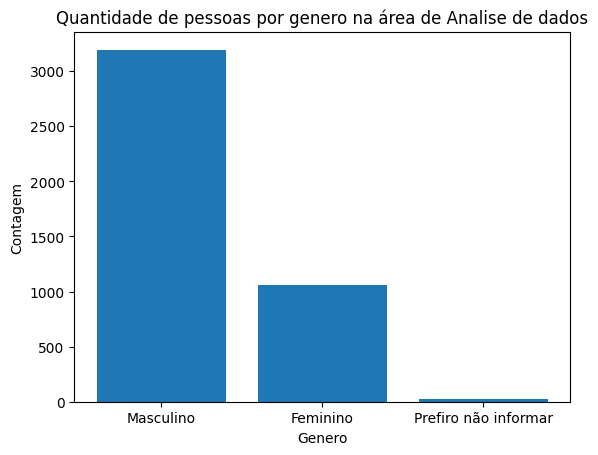

In [ ]:
#Criando primeiro grafico com dados da variavel usando matplotlib
plt.figure()
plt.bar(height = genero_counts.values, x =  genero_counts.index)
plt.title('Quantidade de pessoas por genero na área de Analise de dados')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.show()

In [ ]:
#importando biblioteca seaborn
import seaborn as sns

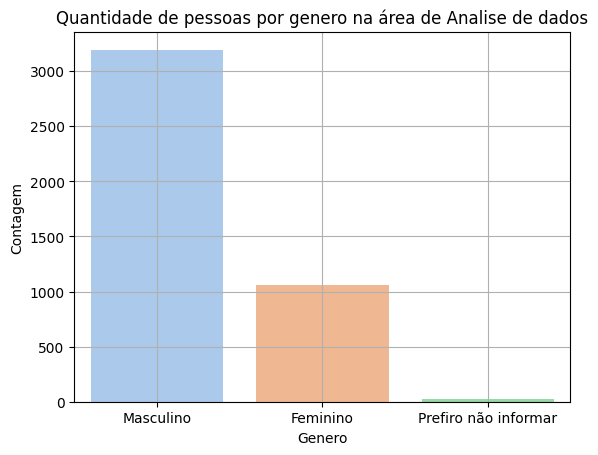

In [ ]:
#Criando segundo grafico usando biblioteca seaborn
plt.figure()
sns.countplot(data =  dados, x = 'GENERO', palette = 'pastel')
plt.title('Quantidade de pessoas por genero na área de Analise de dados')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [ ]:
# Convertendo a coluna 'SALARIO' para numérica, tratando erros como NaN
dados['SALARIO'] = pd.to_numeric(dados['SALARIO'], errors='coerce')

# calculando a média de salarios por idade e atribuindo a variavel
salario_por_idade = dados.groupby("IDADE")['SALARIO'].mean()
salario_por_idade

,SALARIO
IDADE,
18.0,4230.307692
19.0,4519.590909
20.0,4778.384615
21.0,4578.737179
22.0,4394.689815
23.0,5602.406897
24.0,6151.622449
25.0,7616.392336
26.0,7700.071174


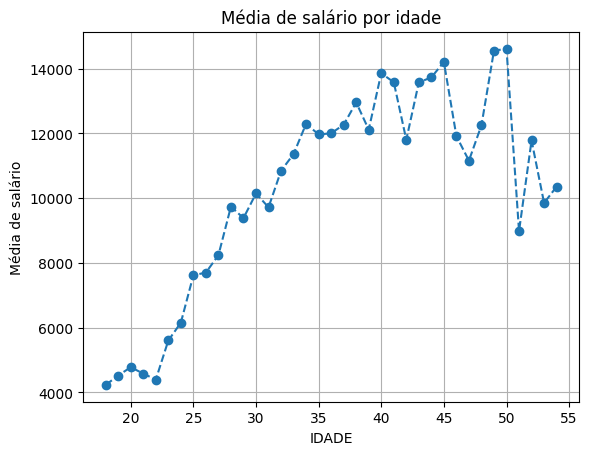

In [ ]:
#Criando grafico com a média salarial por idade
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values,  marker = 'o', linestyle = '--')
plt.xlabel('IDADE')
plt.ylabel('Média de salário')
plt.title('Média de salário por idade')
plt.grid(True)
plt.show()

In [ ]:
#importação da biblioteca plotly.express para geração de gráfico
import plotly.express as px

In [ ]:
#Criando gráfico da média salarial por idade com plotly.express
fig = px.line(salario_por_idade.reset_index(), x = 'IDADE', y = 'SALARIO', title = 'Média de salario por idade', markers = True)
fig.show()

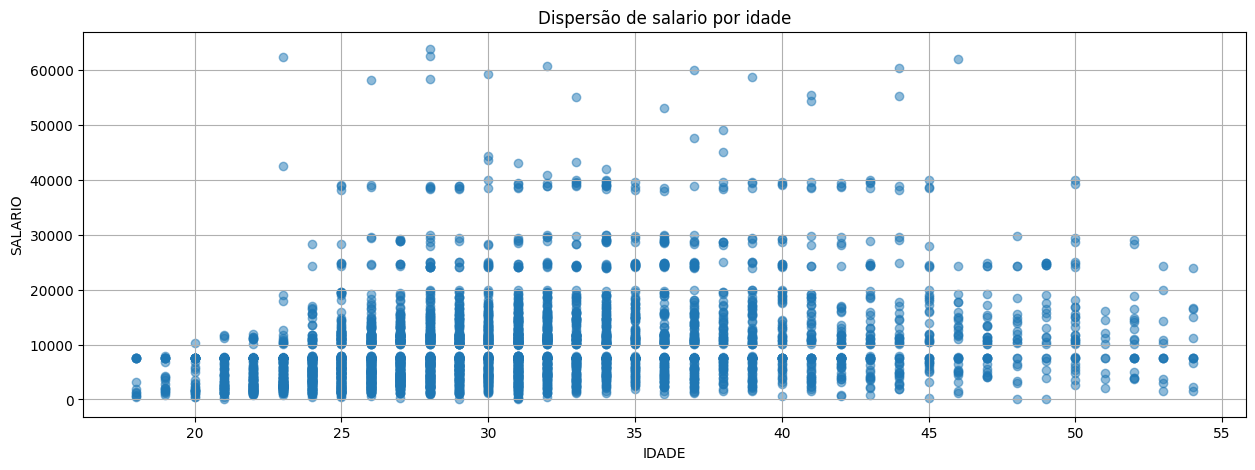

In [ ]:
#Criando gráfico de dispersão com matplotlib
plt.figure(figsize=(15,5))
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha=0.5)
plt.xlabel('IDADE')
plt.ylabel('SALARIO')
plt.title('Dispersão de salario por idade')
plt.grid(True)
plt.show()

In [ ]:
#Criando gráfico de dispersão com plotly.express
fig = px.scatter(dados, x = 'IDADE', y = 'SALARIO', title = 'Dispersão de salario por idade')
fig.show()

#Dashboards

Dashboards são painéis interativos que agregam gráficos e visualizações de dados em um único ambiente.

Facilitam a interpretação e tomada de decisões através de filtros, seleções e controles interativos.

Permitem visualizar diferentes aspectos dos dados em tempo real.

São ferramentas essenciais para análises complexas e multifacetadas.

É como se estivéssemos contando uma história, porém além de usar só palavras estamos usando gráficos, números, tabelas, dados! É um gibi de dados. E como em qualquer história, a ordem das informações é importante para que ela faça sentido.

➡️Benefícios dos Dashboards:

**Visão geral completa:** Reúnem diversas informações em um único local, facilitando a compreensão das relações entre os dados.

**Análise interativa:** Permitem explorar os dados em tempo real, filtrando, selecionando e ajustando visualizações.

**Tomada de decisões mais rápida:** Facilitam a identificação de padrões, tendências e insights acionáveis.

**Comunicação eficaz:** Transmitem informações de forma clara, concisa e visualmente atraente.

➡️Ferramentas para Criação de Dashboards:

**Power BI:** Ampla variedade de fontes de dados, visualizações interativas, ferramentas de limpeza e transformação de dados.

**Tableau:** Reconhecida pela facilidade de uso e poder de análise visual.

**Qlik Sense:** Combina visualização de dados com recursos avançados de análise.

**Looker:** Plataforma de inteligência de negócios baseada na nuvem, com foco na exploração, visualização e análise de dados de forma intuitiva e colaborativa.

##Avaliar Dashboard baseado neste caderno criado com looker:
https://lookerstudio.google.com/reporting/8f5598c9-70ce-46b9-9d30-d146f86c909d